# Quickstart: Working with Narrow Data
If you like working with multi-indexed `pandas.DataFrame` variables, you might want to use the "narrow data" format as an alternative to `get_timeseries`-based tuples.

This example shows how to use narrow data in combination with Seaborn to apply summarization methods on groups of timeseries.

In [1]:
import numpy
import pandas
import pathlib
from matplotlib import pyplot, cm
import seaborn

import bletl

### Parse the raw data file

In [2]:
filepath = pathlib.Path(r'..\bletl\tests\data\BL1\NT_1200rpm_30C_DO-GFP75-pH-BS10_12min_20171221_121339.csv')
bldata = bletl.parse(filepath, lot_number=1515, temp=30)
bldata

BLData(model=BL1) {
  "DO": FilterTimeSeries(103 cycles, 48 wells),
  "GFP75": FilterTimeSeries(103 cycles, 48 wells),
  "pH": FilterTimeSeries(103 cycles, 48 wells),
  "BS10": FilterTimeSeries(103 cycles, 48 wells),
}

### Get narrow data
You can access the narrow data via methods on the `BLData` or `FilterTimeSeries` objects:

In [3]:
narrow = bldata.get_unified_narrow_data()
narrow.head()

,well,cycle,time,DO,GFP75,pH,BS10
0,A01,1,0.00523,96.605204,54.76,7.590411,11.786574
1,A01,2,0.21047,98.859258,54.62,7.576478,12.167130
2,A01,3,0.41047,99.428472,54.84,7.562804,12.210841
3,A01,4,0.61056,102.309616,55.01,7.549377,12.474002
4,A01,5,0.81047,104.657712,54.90,7.549377,11.918877


### A quick plot using seaborn
The following cell uses pandas grouping to create a DataFrame that is fed to `seaborn`.

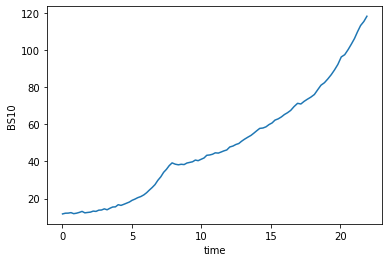

In [4]:
seaborn.lineplot(data=narrow.groupby('well').get_group('A01'), x='time', y='BS10')

### Replicate condensation using seaborn
In some cases, you might want to group several biological replicates and apply mean/std summarization statistics instead of plotting each well individually.

The next cell does exactly that using a pandas query and summarization with `seaborn`.

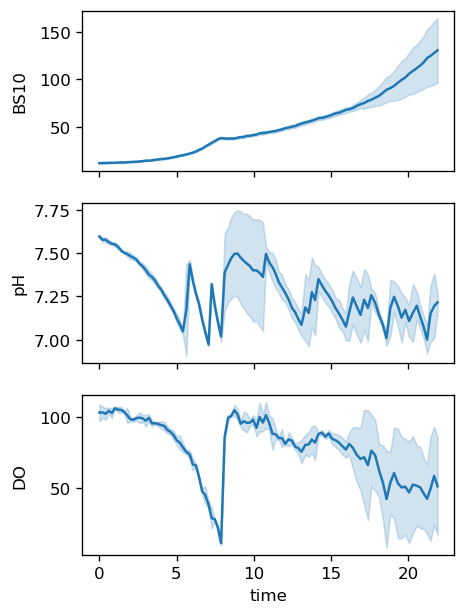

In [5]:
replicate_group = ['A01', 'B01', 'C01']
sub = narrow.query('well in @replicate_group')

fig, ax = pyplot.subplots(3, figsize=(4,6), sharex=True, dpi=120)
seaborn.lineplot(data=sub, x='time', y='BS10', ci='sd', ax=ax[0])
seaborn.lineplot(data=sub, x='time', y='pH', ci='sd', ax=ax[1])
seaborn.lineplot(data=sub, x='time', y='DO', ci='sd', ax=ax[2])
fig.align_ylabels()